# K-means Clustering

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = pd.read_csv("dataset_Mars.csv") # Load dataset
data

,PMC,Detector,Mg_%,Al_%,Ca_%,Ti_%,Fe_%,Si_%,Mg_int,Al_int,Ca_int,Ti_int,Fe_int,Si_int,image_i,image_j
0,7,A,0.4605,0.0305,22.9336,0.1140,1.0066,0.0067,31.9,8.0,50624.2,152.2,2015.6,5.0,409.04,416.18
1,7,B,0.1968,0.0735,22.4898,0.1392,1.1196,0.0196,13.8,19.8,50480.9,188.8,2270.2,14.9,409.04,416.18
2,8,A,0.5142,0.0000,22.6415,0.1949,1.0006,0.0130,35.7,0.0,50074.6,261.4,2009.1,9.7,408.99,413.59
3,8,B,0.4354,0.0271,21.9504,0.2441,1.0346,0.0150,30.8,7.3,49673.5,335.7,2123.7,11.4,408.99,413.59
4,9,A,0.3532,0.0570,26.5924,0.1641,0.3400,0.0179,24.7,15.2,57985.5,211.6,665.5,13.5,408.94,410.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8050,4037,A,0.2774,0.0165,20.7999,0.0357,0.6332,0.0000,19.5,4.4,46253.5,47.3,1267.2,0.0,304.80,414.02
8051,4037,B,0.5039,0.0297,22.1842,0.0652,0.7391,0.0070,36.2,8.0,50318.6,88.8,1520.9,5.4,304.80,414.02
8052,4038,A,0.3707,0.0599,22.2514,0.0329,0.9844,0.0326,25.6,15.7,48856.2,43.6,1963.0,24.2,304.76,416.61
8053,4038,B,0.2642,0.0576,21.6834,0.0768,0.9042,0.0106,18.4,15.3,47978.6,102.1,1808.3,8.0,304.76,416.61


In [2]:
data.info() #return data type and number of non-null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8055 entries, 0 to 8054
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PMC       8055 non-null   int64  
 1   Detector  8055 non-null   object 
 2   Mg_%      8055 non-null   float64
 3   Al_%      8055 non-null   float64
 4   Ca_%      8055 non-null   float64
 5   Ti_%      8055 non-null   float64
 6   Fe_%      8055 non-null   float64
 7   Si_%      8055 non-null   float64
 8   Mg_int    8055 non-null   float64
 9   Al_int    8055 non-null   float64
 10  Ca_int    8055 non-null   float64
 11  Ti_int    8055 non-null   float64
 12  Fe_int    8055 non-null   float64
 13  Si_int    8055 non-null   float64
 14  image_i   8055 non-null   float64
 15  image_j   8055 non-null   float64
dtypes: float64(14), int64(1), object(1)
memory usage: 1007.0+ KB


In [3]:
data.describe()   # return data summary (Count, Mean, Standard Deviation, Minimum Value, 25th Percentile,
                                    #        50th Percentile (Median), 75th Percentile, Maximum Value)

,PMC,Mg_%,Al_%,Ca_%,Ti_%,Fe_%,Si_%,Mg_int,Al_int,Ca_int,Ti_int,Fe_int,Si_int,image_i,image_j
count,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000,8055.000000
mean,2022.490503,0.384306,0.036671,24.912457,0.045512,0.498338,0.008542,26.892129,9.749050,54690.851968,61.799926,1004.379888,6.452688,356.498369,299.058809
std,1164.135723,0.125565,0.023224,3.375734,0.070177,0.501005,0.019358,8.455740,6.132471,6392.186757,99.957311,1043.179731,14.880110,29.674268,66.747572
min,7.000000,0.000000,0.000000,2.779300,0.000000,0.000000,0.000000,0.000000,0.000000,6169.300000,0.000000,0.000000,0.000000,304.760000,187.270000
25%,1014.500000,0.296700,0.019500,22.746850,0.000000,0.101600,0.000000,20.900000,5.200000,50569.200000,0.000000,196.750000,0.000000,330.825000,240.920000
50%,2022.000000,0.371800,0.035000,24.955400,0.022100,0.390500,0.001600,26.300000,9.300000,55223.300000,28.700000,775.700000,1.200000,357.300000,296.590000
75%,3030.500000,0.460500,0.051600,27.099950,0.068300,0.740750,0.011300,32.300000,13.700000,59844.050000,90.400000,1492.300000,8.600000,382.160000,356.450000
max,4038.000000,1.120800,0.133700,53.427400,1.472800,5.300000,0.449100,69.200000,36.100000,64530.300000,2144.900000,12175.000000,336.700000,409.040000,416.610000


In [4]:
data.skew(axis = 0) #return skewness of each column

PMC        0.000005
Mg_%       0.596181
Al_%       0.516170
Ca_%      -0.217566
Ti_%       4.861068
Fe_%       2.371633
Si_%       8.859259
Mg_int     0.405842
Al_int     0.491682
Ca_int    -1.124496
Ti_int     5.222830
Fe_int     2.706598
Si_int     9.309127
image_i    0.001285
image_j    0.053645
dtype: float64

In [5]:
data.corr() #return correlation between columns

,PMC,Mg_%,Al_%,Ca_%,Ti_%,Fe_%,Si_%,Mg_int,Al_int,Ca_int,Ti_int,Fe_int,Si_int,image_i,image_j
PMC,1.000000,-0.073067,-0.041676,-0.199568,0.101096,0.165004,0.022688,-0.068648,-0.038706,-0.196897,0.095527,0.160400,0.021157,-0.999459,0.001755
Mg_%,-0.073067,1.000000,0.229094,0.374116,-0.163251,-0.208824,-0.131793,0.990045,0.197850,0.261324,-0.159369,-0.204912,-0.138304,0.071871,-0.122297
Al_%,-0.041676,0.229094,1.000000,0.226994,-0.094115,-0.117397,-0.066503,0.218069,0.995913,0.184657,-0.086496,-0.112778,-0.071094,0.040606,-0.100058
Ca_%,-0.199568,0.374116,0.226994,1.000000,-0.615361,-0.773401,-0.553537,0.347910,0.209149,0.934574,-0.617210,-0.770994,-0.535491,0.195127,-0.336184
Ti_%,0.101096,-0.163251,-0.094115,-0.615361,1.000000,0.778559,0.362068,-0.183545,-0.105462,-0.651854,0.996293,0.778249,0.334102,-0.097908,0.159526
Fe_%,0.165004,-0.208824,-0.117397,-0.773401,0.778559,1.000000,0.370548,-0.232644,-0.131089,-0.816493,0.790920,0.999024,0.337309,-0.161783,0.263164
Si_%,0.022688,-0.131793,-0.066503,-0.553537,0.362068,0.370548,1.000000,-0.138349,-0.070693,-0.585469,0.374513,0.376262,0.990591,-0.021296,0.098279
Mg_int,-0.068648,0.990045,0.218069,0.347910,-0.183545,-0.232644,-0.138349,1.000000,0.196769,0.278201,-0.180767,-0.228392,-0.143307,0.067649,-0.116444
Al_int,-0.038706,0.197850,0.995913,0.209149,-0.105462,-0.131089,-0.070693,0.196769,1.000000,0.194119,-0.098954,-0.126545,-0.074064,0.037736,-0.096741
Ca_int,-0.196897,0.261324,0.184657,0.934574,-0.651854,-0.816493,-0.585469,0.278201,0.194119,1.000000,-0.655023,-0.812578,-0.556383,0.192652,-0.336095


In [6]:
data.cov() #return co-varian between columns

,PMC,Mg_%,Al_%,Ca_%,Ti_%,Fe_%,Si_%,Mg_int,Al_int,Ca_int,Ti_int,Fe_int,Si_int,image_i,image_j
PMC,1.355212e+06,-10.680485,-1.126761,-784.266569,8.259185,96.236595,0.511291,-675.748995,-276.320474,-1.465181e+06,11115.841072,1.947901e+05,366.494590,-34526.181332,136.355070
Mg_%,-1.068049e+01,0.015767,0.000668,0.158578,-0.001439,-0.013137,-0.000320,1.051175,0.152349,2.097476e+02,-2.000264,-2.684077e+01,-0.258410,0.267794,-1.024993
Al_%,-1.126761e+00,0.000668,0.000539,0.017796,-0.000153,-0.001366,-0.000030,0.042824,0.141840,2.741291e+01,-0.200793,-2.732279e+00,-0.024569,0.027984,-0.155105
Ca_%,-7.842666e+02,0.158578,0.017796,11.395577,-0.145779,-1.308021,-0.036173,9.930844,4.329726,2.016653e+04,-208.264552,-2.715053e+03,-26.898398,19.546334,-75.749558
Ti_%,8.259185e+00,-0.001439,-0.000153,-0.145779,0.004925,0.027374,0.000492,-0.108916,-0.045387,-2.924135e+02,6.988742,5.697379e+01,0.348885,-0.203890,0.747248
Fe_%,9.623660e+01,-0.013137,-0.001366,-1.308021,0.027374,0.251006,0.003594,-0.985565,-0.402759,-2.614832e+03,39.608563,5.221278e+02,2.514644,-2.405217,8.800415
Si_%,5.112906e-01,-0.000320,-0.000030,-0.036173,0.000492,0.003594,0.000375,-0.022646,-0.008392,-7.244764e+01,0.724691,7.598366e+00,0.285346,-0.012233,0.126989
Mg_int,-6.757490e+02,1.051175,0.042824,9.930844,-0.108916,-0.985565,-0.022646,71.499531,10.203354,1.503696e+04,-152.786865,-2.014615e+03,-18.031276,16.974219,-65.720954
Al_int,-2.763205e+02,0.152349,0.141840,4.329726,-0.045387,-0.402759,-0.008392,10.203354,37.607203,7.609445e+03,-60.657313,-8.095440e+02,-6.758496,6.867151,-39.598711
Ca_int,-1.465181e+06,209.747585,27.412913,20166.530701,-292.413516,-2614.832436,-72.447636,15036.963035,7609.444984,4.086005e+07,-418524.487087,-5.418435e+06,-52921.208513,36542.850990,-143399.481030


In [7]:
# Select a subset %_value of data
feature_cols = data.drop(columns=["PMC","Detector","Mg_int","Al_int", "Ca_int",
                                  "Ti_int", "Fe_int", "Si_int", "image_i", "image_j"])
feature_cols

,Mg_%,Al_%,Ca_%,Ti_%,Fe_%,Si_%
0,0.4605,0.0305,22.9336,0.1140,1.0066,0.0067
1,0.1968,0.0735,22.4898,0.1392,1.1196,0.0196
2,0.5142,0.0000,22.6415,0.1949,1.0006,0.0130
3,0.4354,0.0271,21.9504,0.2441,1.0346,0.0150
4,0.3532,0.0570,26.5924,0.1641,0.3400,0.0179
...,...,...,...,...,...,...
8050,0.2774,0.0165,20.7999,0.0357,0.6332,0.0000
8051,0.5039,0.0297,22.1842,0.0652,0.7391,0.0070
8052,0.3707,0.0599,22.2514,0.0329,0.9844,0.0326
8053,0.2642,0.0576,21.6834,0.0768,0.9042,0.0106


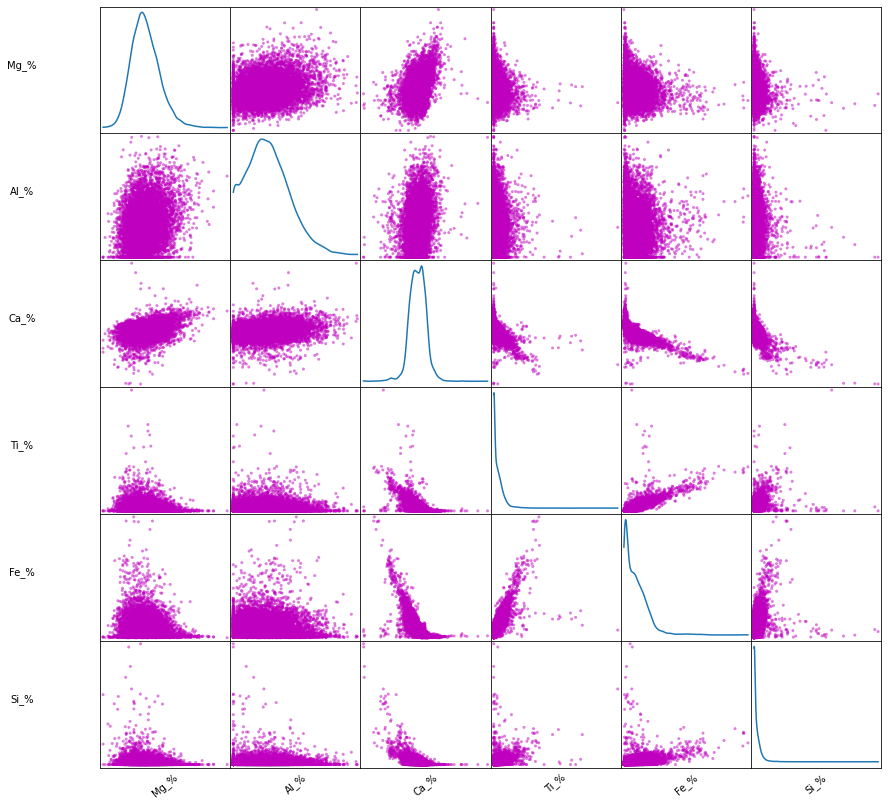

In [21]:
#Scatterplot Matrix
sm = scatter_matrix(feature_cols, figsize=(14, 14), diagonal='kde',color='m')
#Change label rotation
[s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]
#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()


Text(0, 0.5, 'Sum of squared distance')

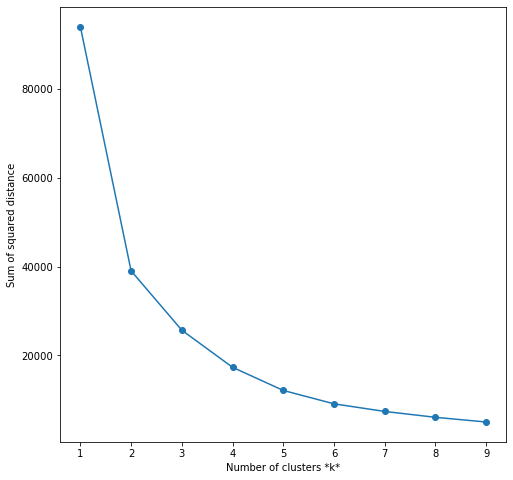

In [9]:
features = np.array(feature_cols)
# Elbow Method to find a good k number
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(features)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(8, 8))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

In [10]:
# Instantiate k-means algorithm
kmeans = KMeans(n_clusters=2)

# Fit the algorithm to the features
kmeans.fit(features)

# Finding the centroid
centroids = kmeans.cluster_centers_

# Compute the silhouette score
kmeans_silhouette = silhouette_score(
features, kmeans.labels_).round(2)

In [11]:
kmeans_silhouette  # between -1 and 1, closer to 1 is more accurate

0.55

Text(0, 0.5, 'Al_%')

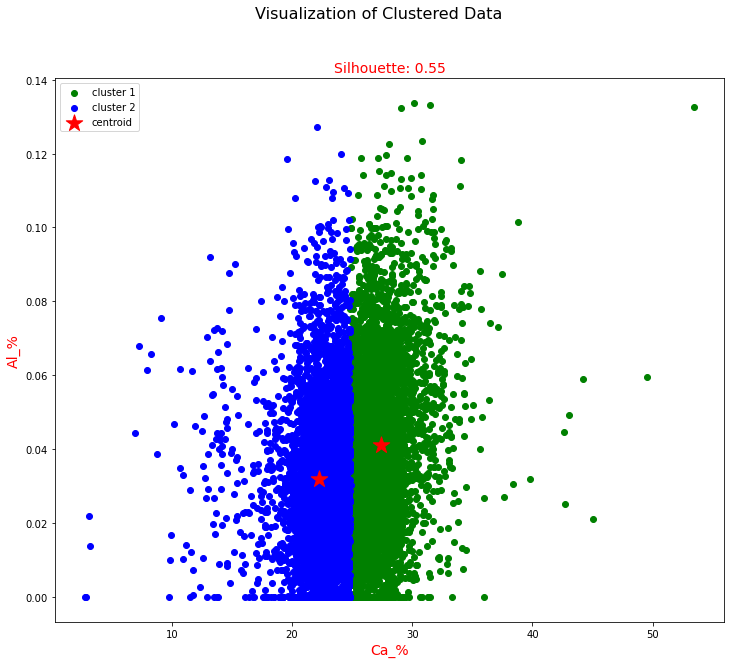

In [12]:
# Plot the clustered data
fig,ax = plt.subplots(1, figsize=(12, 10), sharex=True, sharey=True)
fig.suptitle("Visualization of Clustered Data", fontsize=16)

ax.scatter(features[kmeans.labels_ == 0, 2],
           features[kmeans.labels_ == 0, 1],c='green', label='cluster 1')
ax.scatter(features[kmeans.labels_ == 1, 2], 
           features[kmeans.labels_ == 1, 1],c='blue', label='cluster 2')

ax.scatter(centroids[:, 2], centroids[:, 1], marker='*', s=300,c='r', label='centroid')
ax.legend()
ax.set_title(f"Silhouette: {kmeans_silhouette}", size=14,color='red')
ax.set_xlabel('Ca_%',size=14, color='red')
ax.set_ylabel('Al_%',size=14, color='red')

In [13]:
print(features[kmeans.labels_ == 0,2].max()) # max green cluster x value
print(features[kmeans.labels_ == 1,2].min()) # min blue cluster x value

53.4274
2.7793


In [14]:
cols_name=list(data.columns)[2:8]
print("\nSUM - Min - Max of each column in Clustered data\n")
for i in range(6):
    print(cols_name[i], "\tSum:",round(features[kmeans.labels_ == 0,i].sum(),2),
          "\t Min:", round(features[kmeans.labels_ == 0,i].min(),2),
          "\t Max:", round(features[kmeans.labels_ == 0,i].max(),2),
          "\t Mean:", round(features[kmeans.labels_ == 0,i].mean(),2))


SUM - Min - Max of each column in Clustered data

Mg_% 	Sum: 1733.79 	 Min: 0.04 	 Max: 1.12 	 Mean: 0.42
Al_% 	Sum: 171.16 	 Min: 0.0 	 Max: 0.13 	 Mean: 0.04
Ca_% 	Sum: 113819.26 	 Min: 24.8 	 Max: 53.43 	 Mean: 27.43
Ti_% 	Sum: 50.42 	 Min: 0.0 	 Max: 0.39 	 Mean: 0.01
Fe_% 	Sum: 779.64 	 Min: 0.0 	 Max: 1.49 	 Mean: 0.19
Si_% 	Sum: 10.84 	 Min: 0.0 	 Max: 0.05 	 Mean: 0.0


In [15]:
print("\n SUM - Min - Max of each column in Raw data\n")
for i in range(6):
    print(cols_name[i], "\tSum:",round(features[:,i].sum(),2),
          "\t Min:", round(features[:,i].min(),2),
          "\t Max:", round(features[:,i].max(),2),
          "\t Mean:", round(features[:,i].mean(),2))


 SUM - Min - Max of each column in Raw data

Mg_% 	Sum: 3095.58 	 Min: 0.0 	 Max: 1.12 	 Mean: 0.38
Al_% 	Sum: 295.38 	 Min: 0.0 	 Max: 0.13 	 Mean: 0.04
Ca_% 	Sum: 200669.84 	 Min: 2.78 	 Max: 53.43 	 Mean: 24.91
Ti_% 	Sum: 366.6 	 Min: 0.0 	 Max: 1.47 	 Mean: 0.05
Fe_% 	Sum: 4014.11 	 Min: 0.0 	 Max: 5.3 	 Mean: 0.5
Si_% 	Sum: 68.81 	 Min: 0.0 	 Max: 0.45 	 Mean: 0.01


# Compare with 4-clusters and 6-clusters models, the 2-clusters model is more acccurate since the Silhouette vlue is closer to 1

In [16]:
# Instantiate k-means algorithm
kmeans2 = KMeans(n_clusters=4)

# Fit the algorithm to the features
kmeans2.fit(features)

# Finding the centroid
centroids2 = kmeans2.cluster_centers_

# Compute the silhouette score
kmeans_silhouette2 = silhouette_score(
features, kmeans2.labels_).round(2)

In [17]:
kmeans_silhouette2

0.51

Text(0, 0.5, 'Al_%')

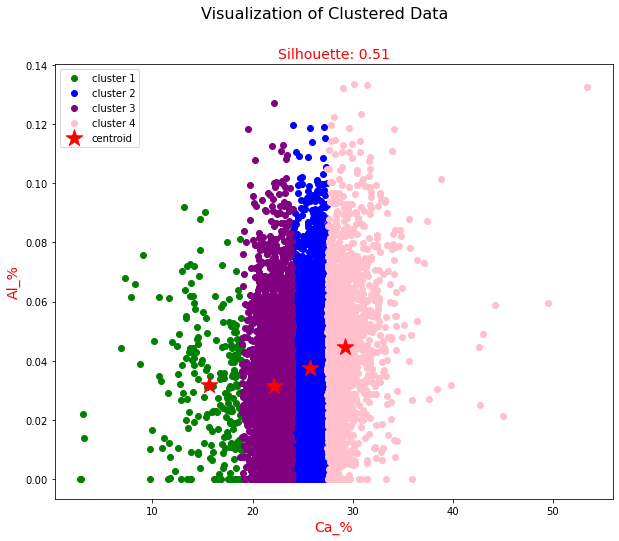

In [18]:
# Plot the clustered data
fig,ax2 = plt.subplots(1, figsize=(10, 8), sharex=True, sharey=True)
fig.suptitle("Visualization of Clustered Data", fontsize=16)

ax2.scatter(features[kmeans2.labels_ == 0, 2], features[kmeans2.labels_ == 0, 1],c='green', label='cluster 1')
ax2.scatter(features[kmeans2.labels_ == 1, 2], features[kmeans2.labels_ == 1, 1],c='blue', label='cluster 2')
ax2.scatter(features[kmeans2.labels_ == 2, 2], features[kmeans2.labels_ == 2, 1],c='purple', label='cluster 3')
ax2.scatter(features[kmeans2.labels_ == 3, 2], features[kmeans2.labels_ == 3, 1],c='pink', label='cluster 4')

ax2.scatter(centroids2[:, 2], centroids2[:, 1], marker='*', s=300,c='r', label='centroid')
ax2.legend()
ax2.set_title(f"Silhouette: {kmeans_silhouette2}",size=14,color='red')
ax2.set_xlabel('Ca_%',size=14,color='red')
ax2.set_ylabel('Al_%',size=14,color='red')

Text(0, 0.5, 'Al_%')

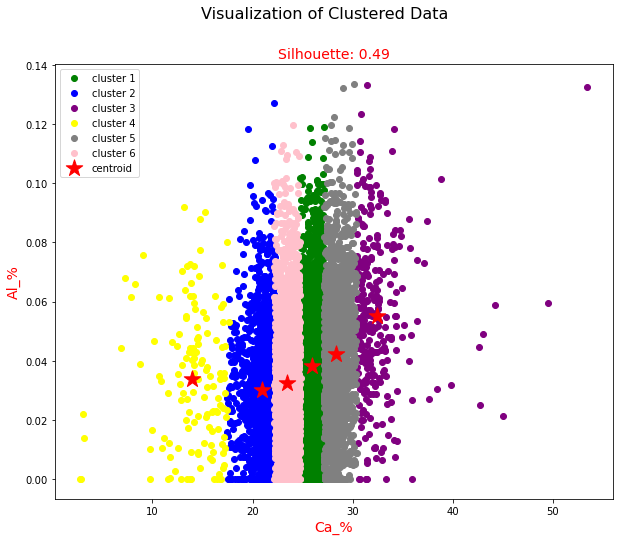

In [19]:
# Instantiate k-means algorithm
kmeans3 = KMeans(n_clusters=6)

# Fit the algorithm to the features
kmeans3.fit(features)

# Finding the centroid
centroids3 = kmeans3.cluster_centers_

# Compute the silhouette score
kmeans_silhouette3 = silhouette_score(
features, kmeans3.labels_).round(2)

# Plot the clustered data
fig,ax3 = plt.subplots(1, figsize=(10, 8), sharex=True, sharey=True)
fig.suptitle("Visualization of Clustered Data", fontsize=16)

ax3.scatter(features[kmeans3.labels_ == 0, 2], features[kmeans3.labels_ == 0, 1],c='green', label='cluster 1')
ax3.scatter(features[kmeans3.labels_ == 1, 2], features[kmeans3.labels_ == 1, 1],c='blue', label='cluster 2')
ax3.scatter(features[kmeans3.labels_ == 2, 2], features[kmeans3.labels_ == 2, 1],c='purple', label='cluster 3')
ax3.scatter(features[kmeans3.labels_ == 3, 2], features[kmeans3.labels_ == 3, 1],c='yellow', label='cluster 4')
ax3.scatter(features[kmeans3.labels_ == 4, 2], features[kmeans3.labels_ == 4, 1],c='gray', label='cluster 5')
ax3.scatter(features[kmeans3.labels_ == 5, 2], features[kmeans3.labels_ == 5, 1],c='pink', label='cluster 6')

ax3.scatter(centroids3[:, 2], centroids3[:, 1], marker='*', s=300,c='r', label='centroid')
ax3.legend()
ax3.set_title(f"Silhouette: {kmeans_silhouette3}",size=14,color='red')
ax3.set_xlabel('Ca_%',size=14,color='red')
ax3.set_ylabel('Al_%',size=14,color='red')